## Colour Palettes created from Apollo Project images

This tutorial is based on the Urban Goggles project, pitched at [AstroHackWeek 2016](http://astrohackweek.org/2016/).<br>
Location: GitHub HQ (San Francisco) & Berkeley Institute for Data Science, 29th August – 2nd September

The target audience are those who are new to Python and would like to start using the  matplotlib and scikit-learn packages.

#### Acknowledgements: 

Thanks to Adrian–Price Whelan (Princeton), Dan Foreman–Mackey (University of Washington), Ben Nelson (CIERA - Northwestern University for sharing their code.
Urban Goggles: https://github.com/adrn/urbangoggles

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import skimage.data as sd
import skimage.color as color
import skimage.transform as st
from skimage.io import imread

from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from mpl_toolkits.mplot3d import Axes3D

ERROR: Line magic function `%plt.style.use` not found.


#### Notes for those new to matplotlib:####

**numpy** reference manual: https://docs.scipy.org/doc/numpy/reference/index.html <br>
Adding ** plt.style.use('my_pltstyle')** afther implot matplotlib.pyplot allows you to customise plotting by using style sheets. Details can be found here: http://matplotlib.org/users/style_sheets.html<br>
**pyplot** provides a MATLAB-like plotting framework. For details see here: 
http://matplotlib.org/api/pyplot_api.html <br>
**skimage** refers to the scikit-learn image algorithms for Python. For an overview see here: http://scikit-image.org/ and for details about the various functions see here: http://scikit-image.org/docs/dev/api/api.html

Also useful, is the **markdown** guide: http://markdown-guide.readthedocs.io/en/latest/

In [22]:
image_filename = "images/AS07-4-1584.png"

First we need to create a data array from the image: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.misc.imread.html#scipy.misc.imread. The data array will be a set of rgb values from each pixel.




In [53]:
rgb = np.array(imread(image_filename)[...,:3], dtype=np.float64) / 255
rgb.min(), rgb.max()

rgb = st.rescale(rgb, 0.1)

In [54]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(rgb.shape)
assert d == 3
rgb_data = np.reshape(rgb, (w * h, d))


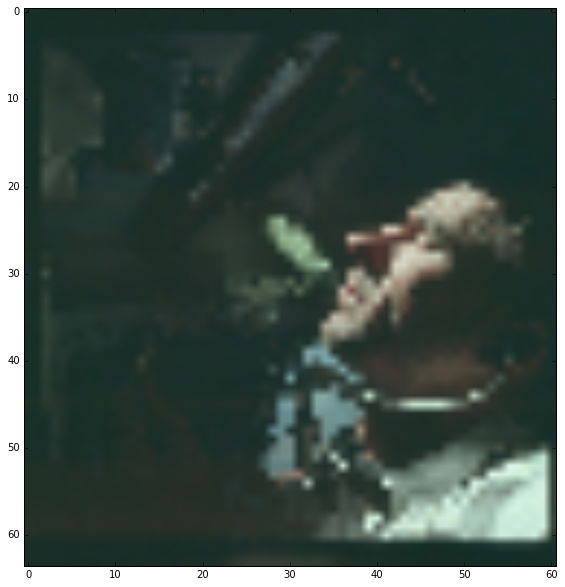

In [55]:
plt.figure(figsize=(12,10))
plt.imshow(rgb)

In [56]:
hsv_data = color.rgb2hsv(rgb)
hsv = hsv_data.reshape(-1, 3).T

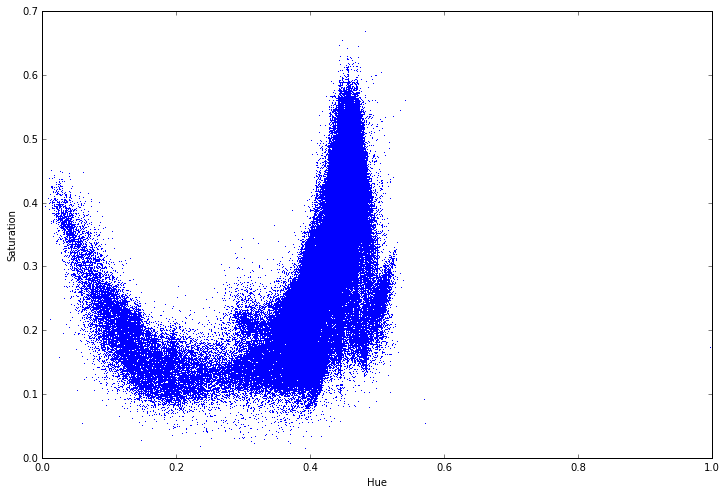

In [37]:
plt.figure(figsize=(12,8))
plt.plot(hsv[0], hsv[1], linestyle='none', alpha=1., marker=',');

plt.xlabel('Hue')
plt.ylabel('Saturation')

In [57]:
phi = 2*np.pi*hsv[0]
x = hsv[1]*np.cos(phi)
y = hsv[1]*np.sin(phi)
z = hsv[2]

# x = rgb_data[...,0].ravel()
# y = rgb_data[...,1].ravel()
# z = rgb_data[...,2].ravel()

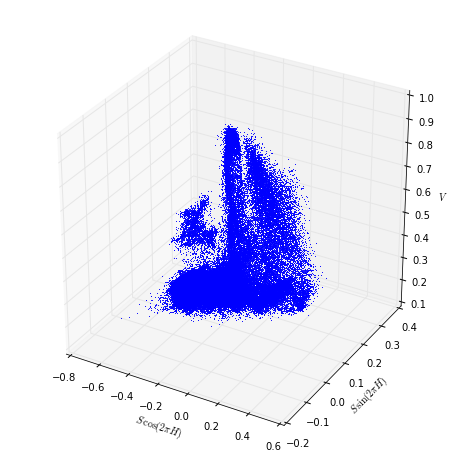

In [39]:
plt.figure(figsize=(8,8))

ax = plt.subplot(1,1,1,projection='3d')
plt.plot(x, y, z, linestyle='none', alpha=0.9, marker=',');

ax.set_xlabel(r'$S\,\cos (2\pi H)$')
ax.set_ylabel(r'$S\,\sin (2\pi H)$')
ax.set_zlabel(r'$V$')


In [58]:
X = np.vstack((x,y,z)).T
subset = shuffle(X)

In [ ]:
clf = KMeans(n_clusters=8)
clf.fit(subset)
centroids = clf.cluster_centers_

# clf = GMM(n_components=16, )
# clf.fit(subset)
# centroids = clf.means_
# centroids = centroids[np.argsort(clf.weights_)]

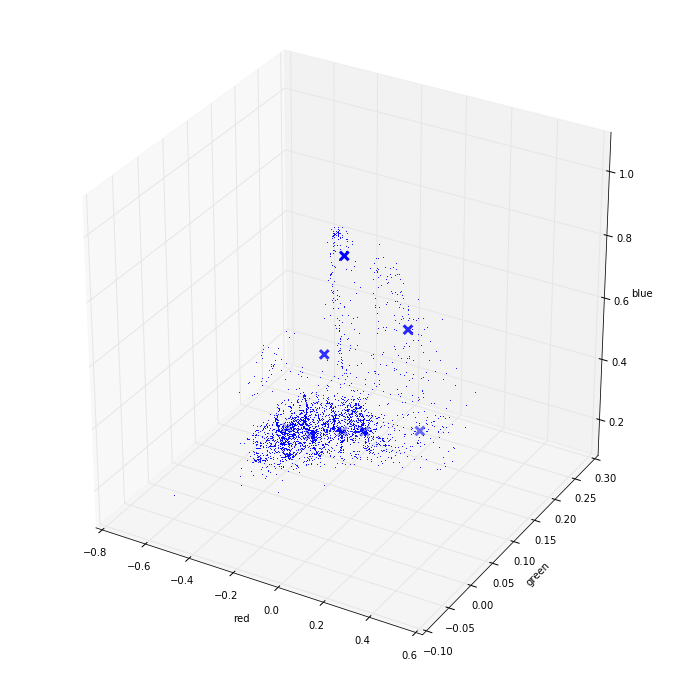

In [59]:
plt.figure(figsize=(12,12))
ax = plt.subplot(1,1,1,projection='3d')

ax.plot(subset[:,0], subset[:,1], subset[:,2], 
        linestyle='none', alpha=0.9, marker=',');

ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
           marker='x', s=75, linewidths=3,
           color='r', zorder=10)

ax.set_xlabel(r'red')
ax.set_ylabel(r'green')
ax.set_zlabel(r'blue')


In [60]:
rgb_clusters = color.hsv2rgb(centroids[None])[0]
# rgb_clusters = centroids

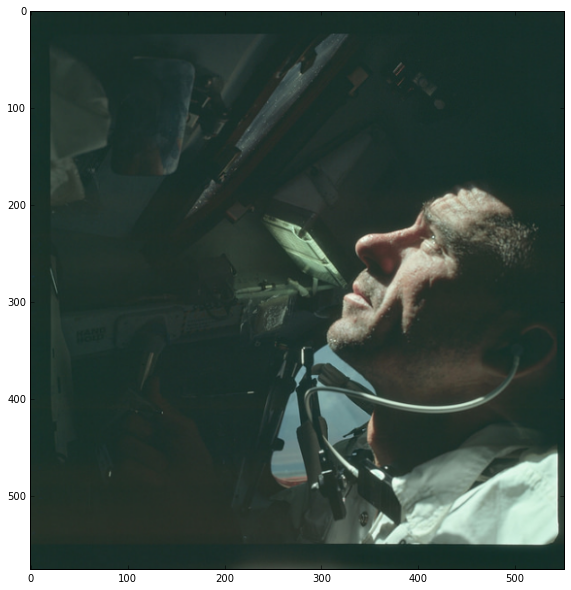

In [47]:
plt.figure(figsize=(12,10))
plt.imshow(rgb)

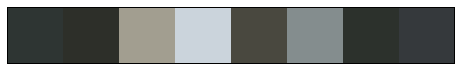

In [61]:
_n = int(np.sqrt(len(centroids)))

fig,ax = plt.subplots(1,1,figsize=(16,1))
ax.imshow(rgb_clusters.reshape(1,len(centroids),3), interpolation='nearest')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

In [62]:
bins = np.linspace(0,1,16)
H,edges = np.histogramdd(X, bins=(bins,bins,bins))

In [63]:
from scipy.ndimage import gaussian_filter

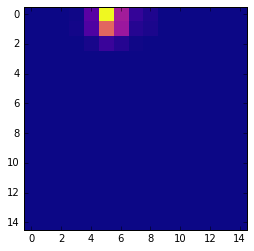

In [52]:
# plt.imshow(np.sum(H, axis=1))
plt.imshow(gaussian_filter(H, 0.5)[8], interpolation='nearest', cmap='plasma')